In [1]:
%matplotlib inline
import numpy as np
import pylab
import comp116

check, report = comp116.start('A5')

# I'll load the data for you and make it unwriteable to protect you. 
# Don't change this!
with np.load('311.npz') as data:
    Times = data['Times']
    Times.flags.writeable = False
    Requests = data['Requests']
    Requests.flags.writeable = False
    Locations = data['Locations']
    Locations.flags.writeable = False
    Coordinates = data['Coordinates']
    Coordinates.flags.writeable = False

## 4. Which complaints happened every day?
Your result should be an alphabetical list of complaints that occur every day in the data. In other words, if there is even a single day without a particular complaint, that complaint should not be in your list. Each complaint should only be in the list once

In [90]:
#how to make this a loop
Day1= set()
for i in range(len(Requests)):
    if Times[i,0]==0:
        Day1.add(Requests[i,0])
Day2= set()
for i in range(len(Requests)):
    if Times[i,0]==1:
        Day2.add(Requests[i,0])
Day3= set()
for i in range(len(Requests)):
    if Times[i,0]==2:
        Day3.add(Requests[i,0])
Day1&Day2&Day3

{'Animal Abuse',
 'Blocked Driveway',
 'Derelict Vehicle',
 'Drinking',
 'Illegal Parking',
 'Noise - Commercial',
 'Noise - Park',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Traffic',
 'Vending'}

In [91]:
A=set(Times[:,0])
f=np.zeros(7)
for n in range(0,np.max(Times)+1):
        requests=np.unique(Requests[Times[:,0]==n][:,0],return_counts=True)
requests

(array(['Animal Abuse', 'Blocked Driveway', 'Derelict Vehicle', 'Drinking',
        'Graffiti', 'Illegal Parking', 'Noise - Commercial',
        'Noise - House Of Worship', 'Noise - Park',
        'Noise - Street/Sidewalk', 'Noise - Vehicle',
        'Posting Advertisement', 'Traffic', 'Vending'], 
       dtype='<U30'),
 array([  2, 171,  36,   2,   1, 134,  81,   2,   6,  45,  26,   1,   5,   4]))

In [4]:
Day1= set()
for i in range(len(Requests)):
    if Times[i,0]==0:
        Day1.add(Requests[i,0])

array(['Animal Abuse', 'Blocked Driveway', 'Derelict Vehicle',
       'Disorderly Youth', 'Drinking', 'Graffiti', 'Illegal Parking',
       'Noise - Commercial', 'Noise - House Of Worship', 'Noise - Park',
       'Noise - Street/Sidewalk', 'Noise - Vehicle',
       'Posting Advertisement', 'Traffic', 'Vending'], 
      dtype='<U30')

In [11]:
day0=set()
for i in range(0,len(Times)):
    D={}
    D[Times[i,0]]=Requests[i,0]
D

{25: 'Blocked Driveway'}

## 7. Where are they drinking in the Bronx?
Plot points at the coordinates of the requests with borough 'Bronx' and complaint 'Drinking'.
Do not augment the plot in any way. No titles, etc.

In [55]:
r=[]
q=[]
Borough = 'Bronx'
Complaint = 'Drinking'
Bronx=Locations[:,1]==Borough
Drinking=Requests[:,0]== Complaint
r.append(Coordinates[Bronx])
q.append(Coordinates[Drinking])


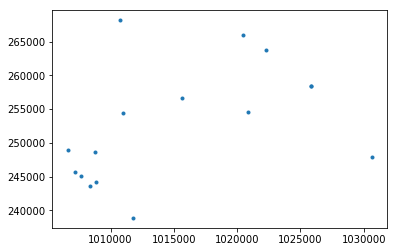

In [72]:
def both(lists,array,Coordinate):
    empty=[]
    for i in range(len(array)):
        if lists[i]== True & array[i]==True:
            empty.append(Coordinate[i])
    return empty
bars=np.array(both(Bronx,Drinking,Coordinates))
xcoord=bars[:,0]
ycoord=bars[:,1]
pylab.plot(xcoord,ycoord,'.')

## 11. How far will an inspector have to travel?
How far will an inspector have to travel to visit, in the order they occurred, all of the coordinates with complaint 'Derelict Vehicle' and city 'Astoria'? That is, compute the sum of the distances between consecutive coordinates of these requests. Your answer will have the same units as the coordinates.

In [87]:
## finding coordinants
complaints=Requests[:,0]=='Derelict Vehicle'
cities=Locations[:,0]=='Astoria'
coords=np.array(both(complaints,cities,Coordinates))
coords
##??

array([[ 1000555.,   216481.],
       [ 1009419.,   217255.],
       [ 1003050.,   218168.],
       [ 1008149.,   215201.],
       [ 1009939.,   219704.],
       [ 1008407.,   215615.],
       [ 1006546.,   223118.],
       [ 1004532.,   220988.],
       [ 1001338.,   215758.],
       [ 1011019.,   218867.],
       [ 1001218.,   218462.],
       [ 1003904.,   221701.],
       [ 1007977.,   218381.]])

In [89]:
## finding distance
r=[]
for i in range(1,len(coords)):
    x=(coords[i,0]-coords[i-1,0])**2
    y=(coords[i,1]-coords[i,1])**2
    r.append(np.sqrt(x+y))
r

[8864.0,
 6369.0,
 5099.0,
 1790.0,
 1532.0,
 1861.0,
 2014.0,
 3194.0,
 9681.0,
 9801.0,
 2686.0,
 4073.0]